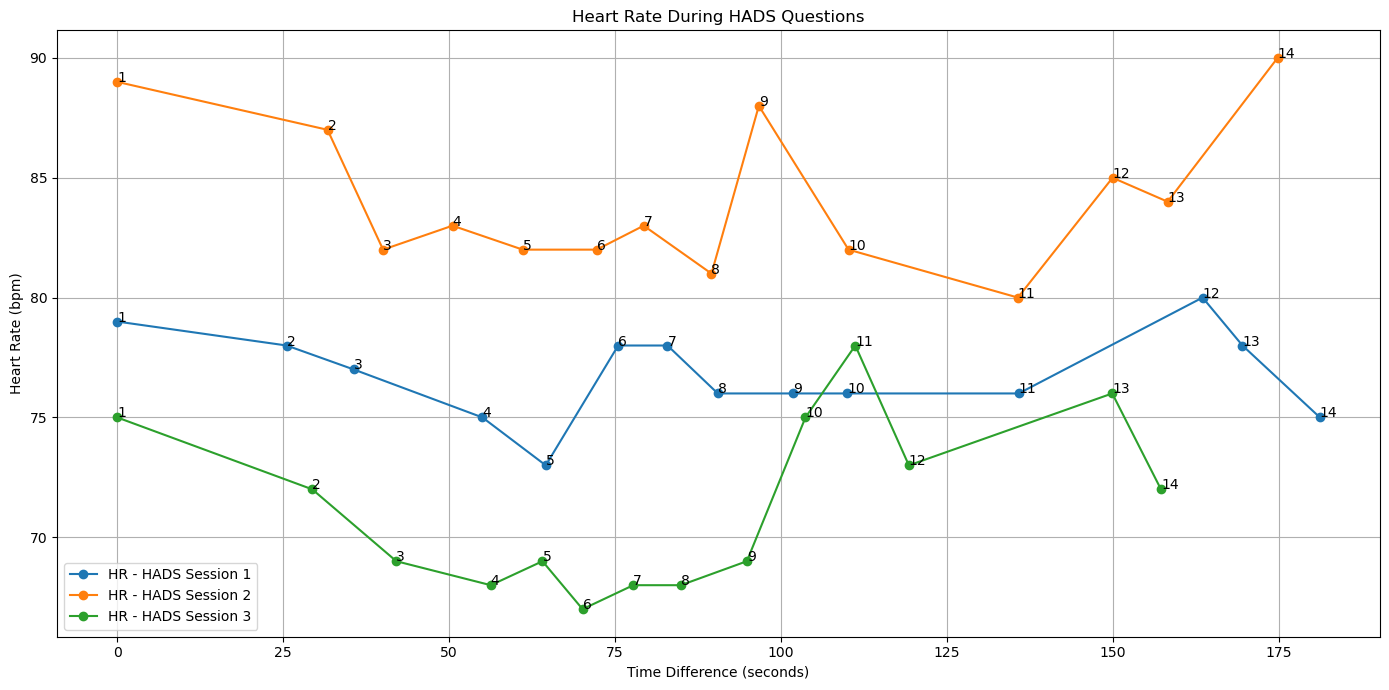

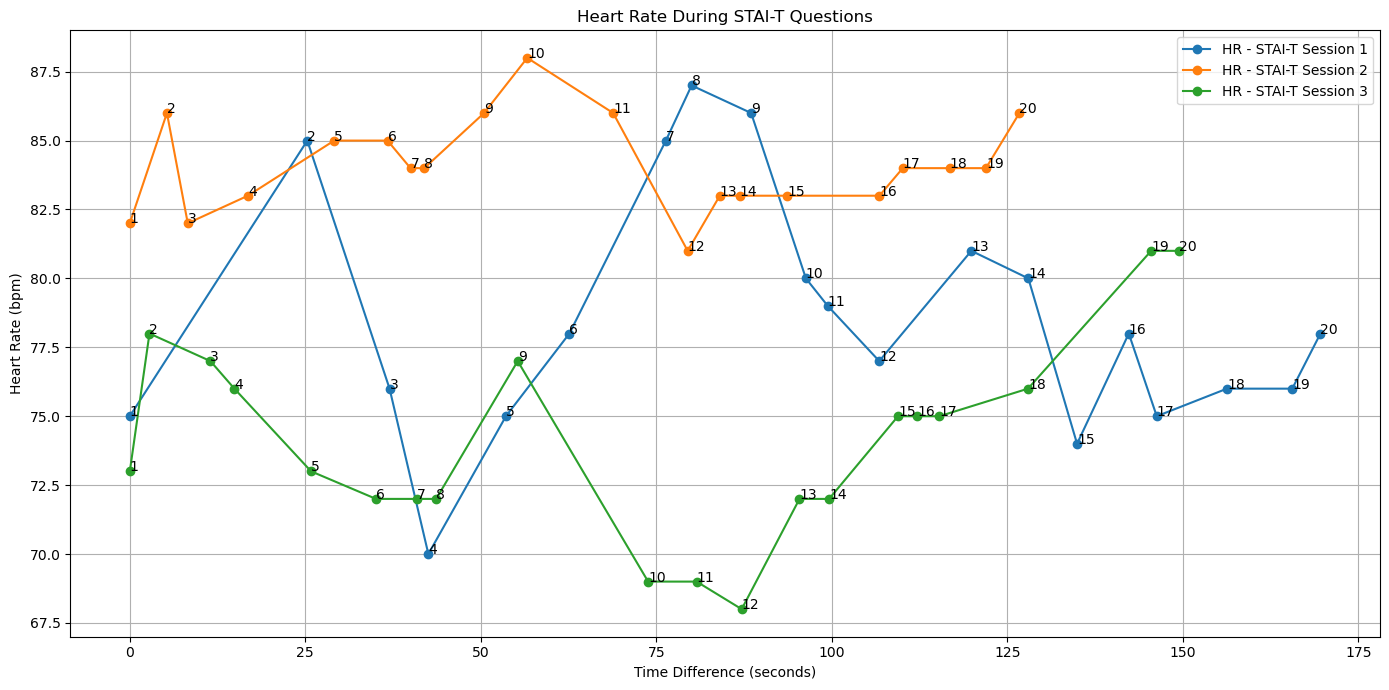

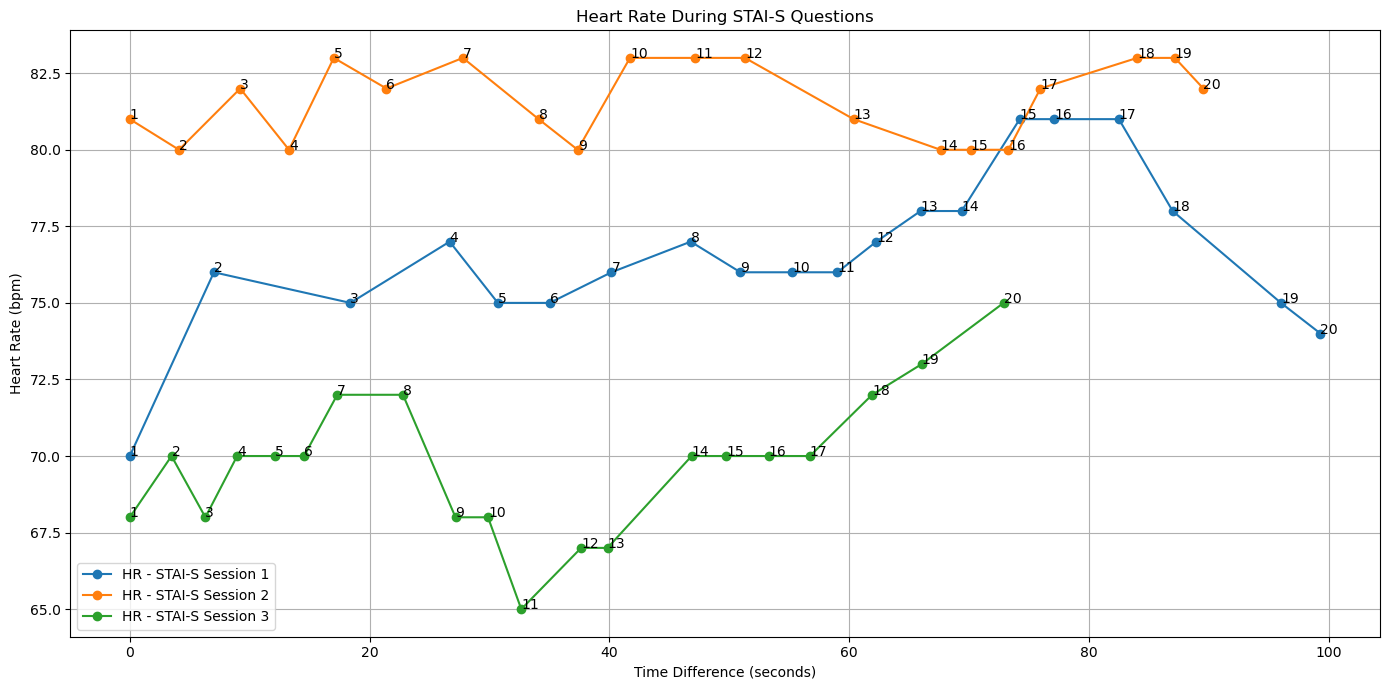

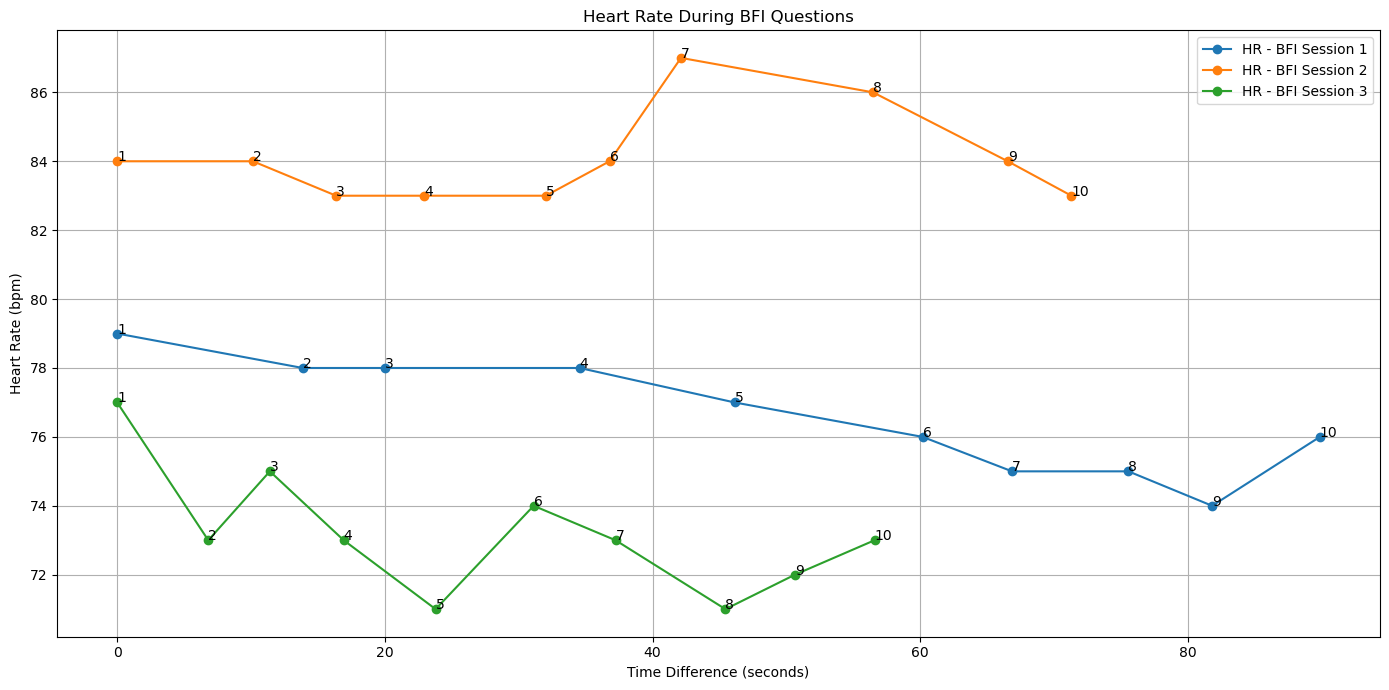

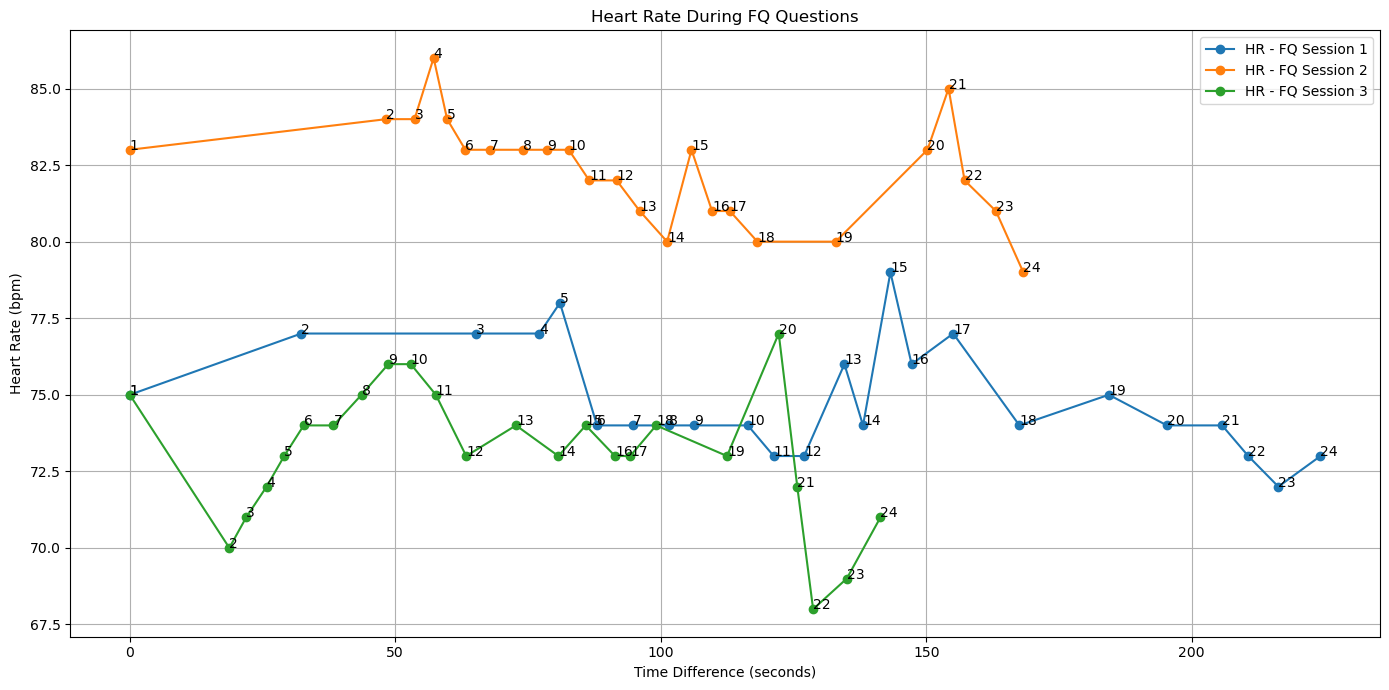

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
hr_01 = pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/hr_01.csv')
hr_02 = pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/hr_02.csv')
hr_03 = pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/hr_03.csv')
psychometric_01 = pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_01.csv')
psychometric_02 = pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_02.csv')
psychometric_03 = pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_03.csv')

# Clean and prepare the psychometric data
psychometric_01.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']
psychometric_02.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']
psychometric_03.columns = ['Type', 'Test', 'Question', 'Answer', 'Time(s)', 'Question Start Time', 'Question Answer Time']

# Convert 'datetime' columns to datetime format
hr_01['datetime'] = pd.to_datetime(hr_01['datetime']).dt.tz_localize(None)
hr_02['datetime'] = pd.to_datetime(hr_02['datetime']).dt.tz_localize(None)
hr_03['datetime'] = pd.to_datetime(hr_03['datetime']).dt.tz_localize(None)
psychometric_01['Question Start Time'] = pd.to_datetime(psychometric_01['Question Start Time']).dt.tz_localize(None)
psychometric_02['Question Start Time'] = pd.to_datetime(psychometric_02['Question Start Time']).dt.tz_localize(None)
psychometric_03['Question Start Time'] = pd.to_datetime(psychometric_03['Question Start Time']).dt.tz_localize(None)

question_types = ['HADS', 'STAI-T', 'STAI-S', 'BFI', 'FQ']

psychometric_data = {
    'HADS': (
        psychometric_01[psychometric_01['Type'] == 'HADS'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'HADS'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'HADS'].reset_index(drop=True)
    ),
    'STAI-T': (
        psychometric_01[psychometric_01['Type'] == 'STAI-T'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'STAI-T'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'STAI-T'].reset_index(drop=True)
    ),
    'STAI-S': (
        psychometric_01[psychometric_01['Type'] == 'STAI-S'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'STAI-S'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'STAI-S'].reset_index(drop=True)
    ),
    'BFI': (
        psychometric_01[psychometric_01['Type'] == 'BFI'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'BFI'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'BFI'].reset_index(drop=True)
    ),
    'FQ': (
        psychometric_01[psychometric_01['Type'] == 'FQ'].reset_index(drop=True),
        psychometric_02[psychometric_02['Type'] == 'FQ'].reset_index(drop=True),
        psychometric_03[psychometric_03['Type'] == 'FQ'].reset_index(drop=True)
    )
}

def process_and_plot(type_key):
    data_01, data_02, data_03 = psychometric_data[type_key]
    
    # Merge datasets
    data_01['closest_hr'] = data_01['Question Start Time'].apply(
        lambda x: hr_01.iloc[(hr_01['datetime'] - x).abs().argsort()[:1]]['heart_rate'].values[0])
    data_02['closest_hr'] = data_02['Question Start Time'].apply(
        lambda x: hr_02.iloc[(hr_02['datetime'] - x).abs().argsort()[:1]]['heart_rate'].values[0])
    data_03['closest_hr'] = data_03['Question Start Time'].apply(
        lambda x: hr_03.iloc[(hr_03['datetime'] - x).abs().argsort()[:1]]['heart_rate'].values[0])

    # Extract question numbers
    data_01['Question Number'] = data_01['Test'].str.extract(r'(\d+)').astype(int)
    data_02['Question Number'] = data_02['Test'].str.extract(r'(\d+)').astype(int)
    data_03['Question Number'] = data_03['Test'].str.extract(r'(\d+)').astype(int)

    # Create time difference
    data_01['Time Difference'] = (data_01['Question Start Time'] - data_01['Question Start Time'].min()).dt.total_seconds()
    data_02['Time Difference'] = (data_02['Question Start Time'] - data_02['Question Start Time'].min()).dt.total_seconds()
    data_03['Time Difference'] = (data_03['Question Start Time'] - data_03['Question Start Time'].min()).dt.total_seconds()


    plt.figure(figsize=(14, 7))
    plt.plot(data_01['Time Difference'], data_01['closest_hr'], label=f'HR - {type_key} Session 1', marker='o')
    plt.plot(data_02['Time Difference'], data_02['closest_hr'], label=f'HR - {type_key} Session 2', marker='o')
    plt.plot(data_03['Time Difference'], data_03['closest_hr'], label=f'HR - {type_key} Session 3', marker='o')


    for i in range(len(data_01)):
        plt.annotate(data_01['Question Number'][i].item(), (data_01['Time Difference'][i], data_01['closest_hr'][i]))

    for i in range(len(data_02)):
        plt.annotate(data_02['Question Number'][i].item(), (data_02['Time Difference'][i], data_02['closest_hr'][i]))

    for i in range(len(data_03)):
        plt.annotate(data_03['Question Number'][i].item(), (data_03['Time Difference'][i], data_03['closest_hr'][i]))

    plt.title(f'Heart Rate During {type_key} Questions')
    plt.xlabel('Time Difference (seconds)')
    plt.ylabel('Heart Rate (bpm)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
for q_type in question_types:
    process_and_plot(q_type)